In [4]:
# import dependencies
from scipy import ndimage
import sys
import os
from time import time
from time import sleep
from PIL import Image
import numpy as np
import pandas as pd
import plotly
from plotly.graph_objs import Bar, Line
from plotly.graph_objs import Scatter, Layout
from plotly.graph_objs.scatter import Marker
from plotly.graph_objs.layout import XAxis, YAxis
import seaborn as sns
from IPython.display import Image as _Imgdis
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn import datasets as ds
import cv2  
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [5]:

import keras
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import average 
from keras.models import Input, Model

keras.__version__


'2.2.4'

In [6]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
%matplotlib inline

def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    acc = mt.accuracy_score(y_test,yhat)
    cm = mt.confusion_matrix(y_test,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f')
    plt.title(title_text+'{:.4f}'.format(acc))
    
 

In [236]:
%%time 

cnn = Sequential()

# let's start with an AlexNet style convolutional phase
cnn.add(Conv2D(filters=32,
                input_shape = (img_wh,img_wh,1),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu', data_format="channels_last")) # more compact syntax

# no max pool before next conv layer!!
cnn.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
    

# add one layer on flattened output
cnn.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn.add(Dense(NUM_CLASSES, activation='softmax'))

# Let's train the model 
cnn.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])


Wall time: 133 ms


In [259]:
cnn.fit(X_train_d, y_train_ohe, batch_size=128, 
        epochs=5, verbose=1,
        validation_data=(X_test_d,y_test_ohe)
        )
                  

Train on 67200 samples, validate on 16800 samples
Epoch 1/5
67200/67200 [==============================] - 69s 1ms/step - loss: 15.5312 - acc: 0.0363 - val_loss: 15.5847 - val_acc: 0.0331
Epoch 2/5
67200/67200 [==============================] - 76s 1ms/step - loss: 15.5332 - acc: 0.0363 - val_loss: 15.5847 - val_acc: 0.0331
Epoch 3/5
67200/67200 [==============================] - 77s 1ms/step - loss: 15.5339 - acc: 0.0362 - val_loss: 15.5847 - val_acc: 0.0331
Epoch 4/5
67200/67200 [==============================] - 77s 1ms/step - loss: 15.5299 - acc: 0.0364 - val_loss: 15.5847 - val_acc: 0.0331
Epoch 5/5
67200/67200 [==============================] - 77s 1ms/step - loss: 15.5187 - acc: 0.0372 - val_loss: 15.5847 - val_acc: 0.0331


In [7]:
asl = pd.read_csv("C:/Users/sulem/Downloads/aslalphabettrain50/asl_alphabet_train_50.csv")
y=asl.drop(asl.columns[1:], axis=1)
asl=asl.drop(asl.columns[0], axis=1)
asl.shape
yasl=np.asarray(asl)

In [8]:
X_train = np.expand_dims(yasl.reshape((-1,50,50)), axis=3)

In [9]:
img_wh=50
NUM_CLASSES=29
X_ar=np.asarray(asl)
y_ar=np.asarray(y)
X_train, X_test, y_train, y_test=train_test_split(X_ar,y_ar, test_size=0.2)
X_train_d = np.expand_dims(X_train.reshape((-1,img_wh,img_wh)), axis=3)
X_test_d = np.expand_dims(X_test.reshape((-1,img_wh,img_wh)), axis=3)

y_train.shape
X_train.shape
y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)


In [66]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5, # used, Int. Degree range for random rotations.
    width_shift_range=0.1, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0.1, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=1, # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.1,#Range for random zoom
    channel_shift_range=0.1,#Range for random channel shifts.
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None)

datagen.fit(X_train_d)

idx = 0

[23]


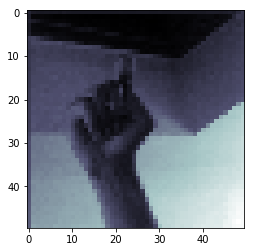

In [81]:
plt.imshow(X_train_d[3000].squeeze(),cmap='bone')
print(y_train[3000])

C:\Users\sulem\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning:

Float image out of standard range; displaying image with stretched contrast.



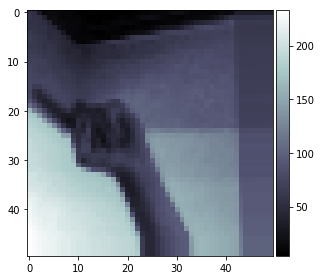

In [82]:
tmps = datagen.flow(X_train_d, y_train_ohe, batch_size=1)

for tmp in tmps:
    imshow(tmp[0].squeeze(),cmap='bone')
   
    break

In [70]:
# what if we just want to use the validation data??
from keras.callbacks import EarlyStopping
from keras.regularizers import l2 
l2_lambda = 0.0001

# Use Kaiming He to regularize ReLU layers: https://arxiv.org/pdf/1502.01852.pdf
# Use Glorot/Bengio for linear/sigmoid/softmax: http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf 
cnn = Sequential()

cnn.add(Conv2D(filters=32,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',
               data_format="channels_last")) # more compact syntax

cnn.add(Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last"))
cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnn.add(Conv2D(filters=64,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last")) # more compact syntax

cnn.add(Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnn.add(Conv2D(filters=128,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last")) # more compact syntax

cnn.add(Conv2D(filters=128,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last"))
    

# add one layer on flattened output

cnn.add(Flatten())
cnn.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn.add(Dense(128, 
              activation='relu',
              kernel_initializer='he_uniform',
              kernel_regularizer=l2(l2_lambda)
       ))
cnn.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn.add(Dense(NUM_CLASSES, 
              activation='softmax', 
              kernel_initializer='glorot_uniform',
              kernel_regularizer=l2(l2_lambda)
             ))

# Let's train the model 
cnn.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations



In [75]:
cnn.fit_generator(datagen.flow(X_train_d, y_train_ohe, batch_size=128), 
                  steps_per_epoch=int(len(X_train)/128), # how many generators to go through per epoch
                  epochs=50, verbose=1,
                  validation_data=(X_test_d,y_test_ohe),
                  callbacks=[EarlyStopping(monitor='val_loss', patience=2)]
                 )

             

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
543/543 [==============================] - 462s 851ms/step - loss: 7.2299 - acc: 0.0653 - val_loss: 2.4392 - val_acc: 0.2630
Epoch 2/50
543/543 [==============================] - 483s 890ms/step - loss: 1.9163 - acc: 0.3941 - val_loss: 0.9151 - val_acc: 0.7139
Epoch 3/50
543/543 [==============================] - 481s 885ms/step - loss: 1.1389 - acc: 0.6344 - val_loss: 0.6242 - val_acc: 0.8102
Epoch 4/50
543/543 [==============================] - 483s 890ms/step - loss: 0.8313 - acc: 0.7464 - val_loss: 0.6059 - val_acc: 0.8533
Epoch 5/50
543/543 [==============================] - 492s 906ms/step - loss: 0.6715 - acc: 0.8068 - val_loss: 0.2716 - val_acc: 0.9457
Epoch 6/50
543/543 [==============================] - 484s 892ms/step - loss: 0.5939 - acc: 0.8432 - val_loss: 0.2906 - val_acc: 0.9393
Epoch 7/50
543/543 [==============================] - 483s 889ms/step - loss: 0.5427 - acc: 0.8655 - val_loss: 0.2755 - val_acc: 0.9522


In [88]:
#%%time

# now lets use the LeNet architecture with batch norm
# We will also use ReLU where approriate and drop out 
from keras.layers.normalization import BatchNormalization
from keras.layers import Add
from keras.layers import average, concatenate
from keras.models import Input, Model

input_holder = Input(shape=(img_wh, img_wh, 1))

# start with a conv layer
x = Conv2D(filters=32,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(input_holder)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=128,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x_split)

x = Conv2D(filters=128,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x = Conv2D(filters=64,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

# now add back in the split layer, x_split (residual added in)
x = Add()([x, x_split])
x = Activation("relu")(x)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = Dense(256)(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES)(x)
x = Activation('softmax')(x)

resnet = Model(inputs=input_holder,outputs=x)

resnet.summary()



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 50, 50, 1)    0                                            
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 50, 50, 32)   320         input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_12 (MaxPooling2D) (None, 25, 25, 32)   0           conv2d_28[0][0]                  
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 25, 25, 64)   18496       max_pooling2d_12[0][0]           
__________________________________________________________________________________________________
max_poolin

In [89]:
resnet.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

In [ ]:
resnet.fit_generator(datagen.flow(X_train_d, y_train_ohe, batch_size=128), 
                  steps_per_epoch=int(len(X_train)/128), # how many generators to go through per epoch
                  epochs=50, verbose=1,
                  validation_data=(X_test_d,y_test_ohe),
                  callbacks=[EarlyStopping(monitor='val_loss', patience=2)]
                 )


Epoch 1/50
114/543 [=====>........................] - ETA: 2:52 - loss: 15.6367 - acc: 0.0337